# Exploring the ADNI dataset using Pandas

Dataset from http://adni.loni.usc.edu. This is a bit of a tutorial on exploring the data with Pandas.

First, how to load matrices in to a Pandas data frame and start exploring them. The code (module) below was put together by Pablo, and is the start of a package to deal with the ADNI data in Python that we can make as a group. This is called 'load_ADNI'. 

We need to load some packages (and modules). With the standard Anaconda distribution I think most of the packages will already be included. However, if you are ever missing anything, the easiest way to get it is to 'pip install ...' on the command line. 

In [3]:
from scipy.io import loadmat #scipy for dealing with scientific specific things -- eg. matrices from matlab
import os #dealing with features of the operating system you are running on.
import numpy as np #for Python's array format -- numpy
from pathlib import Path #this is another way of dealing with paths which was chosen for convenience.
import pandas as pd #pandas dataframes are essentially excel for python, and dealing with this is the focus here.

## Loading data in to dataframe

To play with how to write functions, and to clean up load_ADNI, finding the file path is placed in a function. This is very specific and not flexible -- more generally useful ways of doing this will be better in future, but the function can be amended to reflect that. 

In [6]:
def path_to_file(filename):
    '''
    Returns path for file 'filename`
    '''
    here_dir    = os.path.dirname(os.path.realpath('__file__'))
    par_dir = os.path.abspath(os.path.join(here_dir, os.pardir))
    dataset_dir = os.path.join(par_dir, 'data',str(filename))
    return dataset_dir

The next function is called load_baselines_into_dataframes(). Let's break down what it is doing step by step and explore the data in the process. 

In [23]:
adni = {'adni_1':loadmat(path_to_file('vec_a2b_1y_atr_factor.mat')),
        'adni_3':loadmat(path_to_file('vec_a2b_3y_atr_factor.mat')),
        'adni_5':loadmat(path_to_file('vec_a2b_5y_atr_factor.mat'))}

Let's take a look at what this data looks like. It is a list of dictionaries. 

In [24]:
adni['adni_1']

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Oct 17 13:12:32 2018',
 '__version__': '1.0',
 '__globals__': [],
 'vec_a2b_1y_atr_factor': array([[3.00000e+00, 3.00000e+00, 3.00000e+00, ..., 1.90382e+06,
         0.00000e+00, 1.20000e+01],
        [3.00000e+00, 3.00000e+00, 3.00000e+00, ..., 1.90342e+06,
         0.00000e+00, 1.20000e+01],
        [4.00000e+00, 2.00000e+00, 2.00000e+00, ..., 1.65674e+06,
         0.00000e+00, 1.20000e+01],
        ...,
        [5.14200e+03, 1.00000e+00, 1.00000e+00, ..., 1.45484e+06,
         0.00000e+00, 1.20000e+01],
        [5.14200e+03, 1.00000e+00, 1.00000e+00, ..., 1.42988e+06,
         0.00000e+00, 1.20000e+01],
        [5.14700e+03, 1.00000e+00, 1.00000e+00, ..., 1.54621e+06,
         0.00000e+00, 1.20000e+01]])}

Extract the year 1 data, addressing the actual data in the dictionary using the key 'vec_a2b_1y_atr_factor'

In [25]:
adni['adni_1']['vec_a2b_1y_atr_factor'].shape

(1865, 207)

Get rid of metadata and rearrange in to a big list of matrices.

In [26]:
adni['adni_1'] = adni['adni_1']['vec_a2b_1y_atr_factor']
adni['adni_3'] = adni['adni_3']['vec_a2b_3y_atr_factor']
adni['adni_5'] = adni['adni_5']['vec_a2b_5y_atr_factor']

In [29]:
adni['adni_5']

array([[2.100000e+01, 1.000000e+00, 1.000000e+00, ..., 1.408090e+06,
        0.000000e+00, 6.000000e+01],
       [2.100000e+01, 1.000000e+00, 1.000000e+00, ..., 1.406040e+06,
        0.000000e+00, 6.000000e+01],
       [2.100000e+01, 1.000000e+00, 1.000000e+00, ..., 1.394470e+06,
        0.000000e+00, 6.000000e+01],
       ...,
       [1.427000e+03, 3.000000e+00, 3.000000e+00, ..., 1.491805e+06,
        0.000000e+00, 6.000000e+01],
       [2.010000e+03, 1.000000e+00, 1.000000e+00, ..., 1.348030e+06,
        0.000000e+00, 6.000000e+01],
       [2.119000e+03, 2.000000e+00, 2.000000e+00, ..., 1.605400e+06,
        0.000000e+00, 6.000000e+01]])

In [31]:
len(adni['adni_1'])

1865

So, we can address each year by the first index. There are 207 attributes, including 86-long atrophy vectors at baseline and the time point plus all sorts of other patient information. For instance, the number of months since the baseline measurement was taken. 

eg. make a list of the IDS of the patients for the year 1 data.

In [32]:
IDS = [adni['adni_1'][i][0] for i in range(len(adni['adni_1']))]

There are some repetitions, something that will be explored once we put it in to dataframes.

So, the bit of the code that does that. It loops over an iterator 'j' which addresses each of the three years, and for each feature loops through the full length of all the patient IDS. This actually results in three dataframes, one for each year, in a list. 

In [42]:
adni_df = {'df_'+key: pd.DataFrame({
                        'ID'                        : [adni[key][i][0]   for i in range(len(adni[key]))],
                        'Baseline Dx'               : [adni[key][i][1]   for i in range(len(adni[key]))],
                        '1y Dx'                     : [adni[key][i][2]   for i in range(len(adni[key]))],
                        'End-of-study Dx'           : [adni[key][i][3]   for i in range(len(adni[key]))],
                        'Baseline atrophy'          : [adni[key][i][4:90] for i in range(len(adni[key]))],
                        'Future atrophy'            : [adni[key][i][90:176] for i in range(len(adni[key]))],
                        'Genetic Info (APOE4)'      : [adni[key][i][176] for i in range(len(adni[key]))],
                        'bl Age'                    : [adni[key][i][177] for i in range(len(adni[key]))],
                        'gender'                    : [adni[key][i][178] for i in range(len(adni[key]))],
                        'education year'            : [adni[key][i][179] for i in range(len(adni[key]))],
                        'marriage'                  : [adni[key][i][180] for i in range(len(adni[key]))],
                        'bl ADAS11'                 : [adni[key][i][181] for i in range(len(adni[key]))],
                        'bl ADAS13'                 : [adni[key][i][182] for i in range(len(adni[key]))],
                        'bl RAVLT_immediate'        : [adni[key][i][183] for i in range(len(adni[key]))],
                        'bl RAVLT_learning'         : [adni[key][i][184] for i in range(len(adni[key]))],
                        'bl RAVLT_forgetting'       : [adni[key][i][185] for i in range(len(adni[key]))],
                        'bl RAVLT_perc_forgetting'  : [adni[key][i][186] for i in range(len(adni[key]))],
                        'bl FAQ'                    : [adni[key][i][187] for i in range(len(adni[key]))],
                        'bl CDR'                    : [adni[key][i][188] for i in range(len(adni[key]))],
                        'bl MMSE'                   : [adni[key][i][189] for i in range(len(adni[key]))],
                        'ft Age'                    : [adni[key][i][190] for i in range(len(adni[key]))],
                        'gender'                    : [adni[key][i][191] for i in range(len(adni[key]))],
                        'education year'            : [adni[key][i][192] for i in range(len(adni[key]))],
                        'marriage'                  : [adni[key][i][193] for i in range(len(adni[key]))],
                        'ft ADAS11'                 : [adni[key][i][194] for i in range(len(adni[key]))],
                        'ft ADAS13'                 : [adni[key][i][195] for i in range(len(adni[key]))],
                        'ft RAVLT_immediate'        : [adni[key][i][196] for i in range(len(adni[key]))],
                        'ft RAVLT_learning'         : [adni[key][i][197] for i in range(len(adni[key]))],
                        'ft RAVLT_forgetting'       : [adni[key][i][198] for i in range(len(adni[key]))],
                        'ft RAVLT_perc_forgetting'  : [adni[key][i][199] for i in range(len(adni[key]))],
                        'ft FAQ'                    : [adni[key][i][200] for i in range(len(adni[key]))],
                        'ft CDR'                    : [adni[key][i][201] for i in range(len(adni[key]))],
                        'ft MMSE'                   : [adni[key][i][202] for i in range(len(adni[key]))],
                        'bl Intracranial Volume'    : [adni[key][i][203] for i in range(len(adni[key]))],
                        'ft Intracranial Volume'    : [adni[key][i][204] for i in range(len(adni[key]))],
                        'end-of-study is_convert'   : [adni[key][i][205] for i in range(len(adni[key]))],
                        'number of months from bl'  : [adni[key][i][206] for i in range(len(adni[key]))]
                         }) for key in adni.keys()}

In [47]:
adni_df['df_adni_1']

,ID,Baseline Dx,1y Dx,End-of-study Dx,Baseline atrophy,Future atrophy,Genetic Info (APOE4),bl Age,gender,education year,...,ft RAVLT_learning,ft RAVLT_forgetting,ft RAVLT_perc_forgetting,ft FAQ,ft CDR,ft MMSE,bl Intracranial Volume,ft Intracranial Volume,end-of-study is_convert,number of months from bl
0,3.0,3.0,3.0,3.0,"[0.42899300267558316, 0.6101146248911582, 0.82...","[0.49130654601460605, 0.5657404677305382, 0.76...",1.0,0.920354,1.0,0.570933,...,-1.634400,1.302757,2.279192,21.999117,12.774359,-9.680302,1920690.0,1903820.0,0.0,12.0
1,3.0,3.0,3.0,3.0,"[0.49130654601460605, 0.5657404677305382, 0.76...","[0.4797399004600559, 0.6013764392125581, 0.791...",1.0,1.084444,1.0,0.570933,...,-2.054917,0.573340,2.279192,18.069977,29.549822,-8.068754,1903820.0,1903420.0,0.0,12.0
2,4.0,2.0,2.0,2.0,"[0.38735705827325556, 0.16893355463538812, 0.6...","[0.49331091696947693, 0.373494804762419, 0.685...",0.0,-1.345638,1.0,-2.351808,...,-0.793366,-0.885494,-0.646280,-0.266010,3.454657,-2.428334,1679440.0,1656740.0,0.0,12.0
3,4.0,2.0,2.0,2.0,"[0.3269262100101499, 0.27174938386729525, 0.68...","[0.540077225624267, 0.18117533851644893, 0.625...",0.0,-1.266965,1.0,-2.351808,...,0.888701,-0.520786,-0.506970,1.043703,3.454657,-1.622559,1661130.0,1648510.0,0.0,12.0
4,5.0,1.0,1.0,1.0,"[0.5883427925210888, 0.7011389219041197, 0.664...","[0.4331046075873159, 0.642863560168384, 0.6006...",0.0,0.000596,1.0,-0.159752,...,0.047667,0.938048,0.759468,-0.266010,3.454657,0.794764,1634180.0,1632880.0,0.0,12.0
5,6.0,2.0,2.0,2.0,"[0.15479104616439587, 0.4680471723600093, 0.60...","[0.09668576489342542, 0.4138680271876763, 0.54...",0.0,0.772572,2.0,-1.255780,...,-0.793366,1.667466,2.279192,-0.266010,5.318598,-2.428334,1485830.0,1512740.0,0.0,12.0
6,6.0,2.0,2.0,2.0,"[0.11511853146033484, 0.490436003131249, 0.660...","[0.08021518575120969, 0.49374846239346687, 0.6...",0.0,0.855291,2.0,-1.255780,...,-1.213883,0.938048,1.801564,2.353417,7.182538,-4.039882,1514260.0,1482660.0,0.0,12.0
7,10.0,3.0,3.0,3.0,"[0.3517004675723798, 0.573498452226188, 0.8714...","[0.5556972838750345, 0.5752348951844986, 0.895...",1.0,-0.131103,2.0,-1.621123,...,-2.475434,-0.156077,2.279192,25.928257,18.366180,-0.816785,1467270.0,1469530.0,0.0,12.0
8,14.0,1.0,1.0,1.0,"[0.6697020769159381, 0.6065876239600185, 0.486...","[0.5454367501750802, 0.5122662675458611, 0.540...",0.0,0.460587,2.0,-1.621123,...,-1.213883,-0.885494,-0.586577,-0.266010,-0.273224,-0.816785,1269540.0,1264890.0,0.0,12.0
9,14.0,1.0,1.0,1.0,"[0.5454367501750802, 0.5122662675458611, 0.540...","[0.6475650017695922, 0.5069386449802348, 0.454...",0.0,0.635018,2.0,-1.621123,...,0.468184,0.573340,0.455520,-0.266010,-0.273224,0.794764,1264890.0,1262440.0,0.0,12.0


## Pandas functionality

Now we can start using Pandas functionality (I suppose we ought to know how to do this).

In [48]:
adni_df['df_adni_1'].head(10) #just display thte first few entries.

,ID,Baseline Dx,1y Dx,End-of-study Dx,Baseline atrophy,Future atrophy,Genetic Info (APOE4),bl Age,gender,education year,...,ft RAVLT_learning,ft RAVLT_forgetting,ft RAVLT_perc_forgetting,ft FAQ,ft CDR,ft MMSE,bl Intracranial Volume,ft Intracranial Volume,end-of-study is_convert,number of months from bl
0,3.0,3.0,3.0,3.0,"[0.42899300267558316, 0.6101146248911582, 0.82...","[0.49130654601460605, 0.5657404677305382, 0.76...",1.0,0.920354,1.0,0.570933,...,-1.634400,1.302757,2.279192,21.999117,12.774359,-9.680302,1920690.0,1903820.0,0.0,12.0
1,3.0,3.0,3.0,3.0,"[0.49130654601460605, 0.5657404677305382, 0.76...","[0.4797399004600559, 0.6013764392125581, 0.791...",1.0,1.084444,1.0,0.570933,...,-2.054917,0.573340,2.279192,18.069977,29.549822,-8.068754,1903820.0,1903420.0,0.0,12.0
2,4.0,2.0,2.0,2.0,"[0.38735705827325556, 0.16893355463538812, 0.6...","[0.49331091696947693, 0.373494804762419, 0.685...",0.0,-1.345638,1.0,-2.351808,...,-0.793366,-0.885494,-0.646280,-0.266010,3.454657,-2.428334,1679440.0,1656740.0,0.0,12.0
3,4.0,2.0,2.0,2.0,"[0.3269262100101499, 0.27174938386729525, 0.68...","[0.540077225624267, 0.18117533851644893, 0.625...",0.0,-1.266965,1.0,-2.351808,...,0.888701,-0.520786,-0.506970,1.043703,3.454657,-1.622559,1661130.0,1648510.0,0.0,12.0
4,5.0,1.0,1.0,1.0,"[0.5883427925210888, 0.7011389219041197, 0.664...","[0.4331046075873159, 0.642863560168384, 0.6006...",0.0,0.000596,1.0,-0.159752,...,0.047667,0.938048,0.759468,-0.266010,3.454657,0.794764,1634180.0,1632880.0,0.0,12.0
5,6.0,2.0,2.0,2.0,"[0.15479104616439587, 0.4680471723600093, 0.60...","[0.09668576489342542, 0.4138680271876763, 0.54...",0.0,0.772572,2.0,-1.255780,...,-0.793366,1.667466,2.279192,-0.266010,5.318598,-2.428334,1485830.0,1512740.0,0.0,12.0
6,6.0,2.0,2.0,2.0,"[0.11511853146033484, 0.490436003131249, 0.660...","[0.08021518575120969, 0.49374846239346687, 0.6...",0.0,0.855291,2.0,-1.255780,...,-1.213883,0.938048,1.801564,2.353417,7.182538,-4.039882,1514260.0,1482660.0,0.0,12.0
7,10.0,3.0,3.0,3.0,"[0.3517004675723798, 0.573498452226188, 0.8714...","[0.5556972838750345, 0.5752348951844986, 0.895...",1.0,-0.131103,2.0,-1.621123,...,-2.475434,-0.156077,2.279192,25.928257,18.366180,-0.816785,1467270.0,1469530.0,0.0,12.0
8,14.0,1.0,1.0,1.0,"[0.6697020769159381, 0.6065876239600185, 0.486...","[0.5454367501750802, 0.5122662675458611, 0.540...",0.0,0.460587,2.0,-1.621123,...,-1.213883,-0.885494,-0.586577,-0.266010,-0.273224,-0.816785,1269540.0,1264890.0,0.0,12.0
9,14.0,1.0,1.0,1.0,"[0.5454367501750802, 0.5122662675458611, 0.540...","[0.6475650017695922, 0.5069386449802348, 0.454...",0.0,0.635018,2.0,-1.621123,...,0.468184,0.573340,0.455520,-0.266010,-0.273224,0.794764,1264890.0,1262440.0,0.0,12.0


In [49]:
adni_df['df_adni_1'].describe() #not necessarily useful here, but a generally useful function.

,ID,Baseline Dx,1y Dx,End-of-study Dx,Genetic Info (APOE4),bl Age,gender,education year,marriage,bl ADAS11,...,ft RAVLT_learning,ft RAVLT_forgetting,ft RAVLT_perc_forgetting,ft FAQ,ft CDR,ft MMSE,bl Intracranial Volume,ft Intracranial Volume,end-of-study is_convert,number of months from bl
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,...,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1.865000e+03,1.865000e+03,1865.000000,1865.0
mean,1991.796247,1.812869,1.878820,2.067560,0.557105,-0.315146,1.453619,-0.145452,2.286863,1.585068,...,-0.655937,0.293209,0.862821,6.139998,6.665832,-1.683046,1.529524e+06,1.528636e+06,0.083110,12.0
std,1760.258624,0.665558,0.728266,0.814135,0.666556,1.120308,0.497978,1.013903,0.701595,2.242841,...,1.179793,0.942934,1.280223,9.428528,8.647229,2.908585,1.598744e+05,1.605601e+05,0.276122,0.0
min,3.000000,1.000000,1.000000,1.000000,0.000000,-3.398167,1.000000,-3.813178,0.000000,-1.937757,...,-3.316467,-5.626705,-14.437788,-0.266010,-0.273224,-16.932271,7.161330e+05,7.161330e+05,0.000000,12.0
25%,522.000000,1.000000,1.000000,1.000000,0.000000,-1.049737,1.000000,-0.890438,2.000000,-0.099709,...,-1.634400,-0.520786,-0.228355,-0.266010,-0.273224,-2.428334,1.419560e+06,1.418240e+06,0.000000,12.0
50%,1155.000000,2.000000,2.000000,2.000000,0.000000,-0.261903,1.000000,-0.159752,2.000000,1.003120,...,-0.793366,0.208631,0.846309,1.043703,3.454657,-0.816785,1.519400e+06,1.518680e+06,0.000000,12.0
75%,4173.000000,2.000000,2.000000,3.000000,1.000000,0.444167,2.000000,0.570933,2.000000,2.719856,...,0.047667,0.938048,2.279192,10.211697,10.910419,0.794764,1.632775e+06,1.632270e+06,0.000000,12.0
max,5147.000000,3.000000,3.000000,3.000000,2.000000,2.777301,2.000000,1.301618,4.000000,12.031405,...,3.411802,4.220425,2.279192,39.025391,51.917107,0.794764,2.110290e+06,2.108790e+06,1.000000,12.0


In [50]:
adni_df['df_adni_1'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 34 columns):
ID                          1865 non-null float64
Baseline Dx                 1865 non-null float64
1y Dx                       1865 non-null float64
End-of-study Dx             1865 non-null float64
Baseline atrophy            1865 non-null object
Future atrophy              1865 non-null object
Genetic Info (APOE4)        1865 non-null float64
bl Age                      1865 non-null float64
gender                      1865 non-null float64
education year              1865 non-null float64
marriage                    1865 non-null float64
bl ADAS11                   1865 non-null float64
bl ADAS13                   1865 non-null float64
bl RAVLT_immediate          1865 non-null float64
bl RAVLT_learning           1865 non-null float64
bl RAVLT_forgetting         1865 non-null float64
bl RAVLT_perc_forgetting    1865 non-null float64
bl FAQ                      1865 non-null flo

So there are no missing rows of data, which is good!

## Aggregation

Without too much reference to what the data is actually showing us yet, look at how to manipulate data frames.

How many different patients do we have?

In [51]:
adni_df['df_adni_1']['ID'].nunique()

914

It would be nice to be able to aggregate data for individual patient IDs. While this doesn't make sense all the time (eg. when a single ID has different values on repeat -- why?) we can still look at some of the aspects of the data this way. 

To do this, we need an aggregation rule for each column. This is a method for returning the column names, and then converting to a list. 

In [52]:
adni_df['df_adni_1'].columns.values.tolist()

['ID',
 'Baseline Dx',
 '1y Dx',
 'End-of-study Dx',
 'Baseline atrophy',
 'Future atrophy',
 'Genetic Info (APOE4)',
 'bl Age',
 'gender',
 'education year',
 'marriage',
 'bl ADAS11',
 'bl ADAS13',
 'bl RAVLT_immediate',
 'bl RAVLT_learning',
 'bl RAVLT_forgetting',
 'bl RAVLT_perc_forgetting',
 'bl FAQ',
 'bl CDR',
 'bl MMSE',
 'ft Age',
 'ft ADAS11',
 'ft ADAS13',
 'ft RAVLT_immediate',
 'ft RAVLT_learning',
 'ft RAVLT_forgetting',
 'ft RAVLT_perc_forgetting',
 'ft FAQ',
 'ft CDR',
 'ft MMSE',
 'bl Intracranial Volume',
 'ft Intracranial Volume',
 'end-of-study is_convert',
 'number of months from bl']

We want to make a dictionary of the functions to apply for aggregation.

In [62]:
aggfunctions = {el:0 for el in adni_df['df_adni_1'].columns.values.tolist()}
print(aggfunctions)

{'ID': 0, 'Baseline Dx': 0, '1y Dx': 0, 'End-of-study Dx': 0, 'Baseline atrophy': 0, 'Future atrophy': 0, 'Genetic Info (APOE4)': 0, 'bl Age': 0, 'gender': 0, 'education year': 0, 'marriage': 0, 'bl ADAS11': 0, 'bl ADAS13': 0, 'bl RAVLT_immediate': 0, 'bl RAVLT_learning': 0, 'bl RAVLT_forgetting': 0, 'bl RAVLT_perc_forgetting': 0, 'bl FAQ': 0, 'bl CDR': 0, 'bl MMSE': 0, 'ft Age': 0, 'ft ADAS11': 0, 'ft ADAS13': 0, 'ft RAVLT_immediate': 0, 'ft RAVLT_learning': 0, 'ft RAVLT_forgetting': 0, 'ft RAVLT_perc_forgetting': 0, 'ft FAQ': 0, 'ft CDR': 0, 'ft MMSE': 0, 'bl Intracranial Volume': 0, 'ft Intracranial Volume': 0, 'end-of-study is_convert': 0, 'number of months from bl': 0}


To make our lives easy, for now we'll just take the first for every ID. 

An example, where just the baseline Dx data is aggregated.

In [63]:
adni_df['df_adni_1'][['ID','Baseline Dx']].groupby(adni_df['df_adni_1']['ID']).aggregate('first')

,ID,Baseline Dx
ID,,
3.0,3.0,3.0
4.0,4.0,2.0
5.0,5.0,1.0
6.0,6.0,2.0
10.0,10.0,3.0
14.0,14.0,1.0
15.0,15.0,1.0
16.0,16.0,1.0
19.0,19.0,1.0


In [65]:
baseline_agg = adni_df['df_adni_1'][['ID','Baseline atrophy']].groupby(adni_df['df_adni_1']['ID']).aggregate('first')

In [66]:
new_adni_df = adni_df['df_adni_1'].groupby(adni_df['df_adni_1']['ID']).aggregate('first')

## Plotting some of the things

Let's make some histograms of the metrics, first using the reduced data set that we have aggregated. 

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Future CDR')

<Figure size 432x288 with 0 Axes>

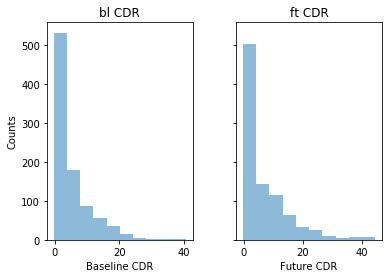

In [68]:
fig = plt.figure()
ax = new_adni_df[['ft CDR', 'bl CDR']].hist(alpha=0.5, grid = False, sharey = True)
ax[0][0].set_ylabel('Counts')
ax[0][0].set_xlabel('Baseline CDR')
ax[0][1].set_xlabel('Future CDR')

Text(0.5, 1.0, 'Demetia score')

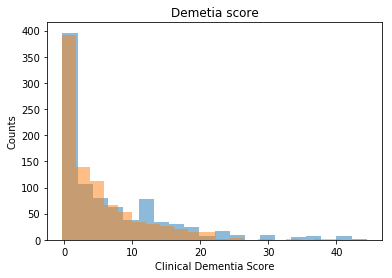

In [69]:
axes = new_adni_df[['ft CDR']].hist(alpha = 0.5, grid = False, bins = 20)
new_adni_df[['bl CDR']].hist(ax = axes, alpha = 0.5, grid = False, bins = 20)
axes[0][0].set_xlabel('Clinical Dementia Score')
axes[0][0].set_ylabel('Counts')
axes[0][0].set_title('Demetia score')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128216198>],
      dtype=object)

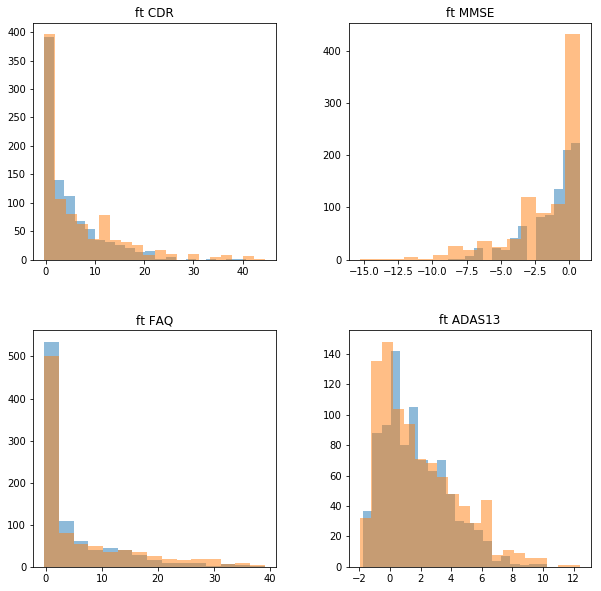

In [70]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
new_adni_df[['bl CDR']].hist(ax = axes[0][0], alpha = 0.5, grid = False, bins = 20)
new_adni_df[['ft CDR']].hist(ax = axes[0][0], alpha = 0.5, grid = False, bins = 20)
new_adni_df[['bl MMSE']].hist(ax = axes[0][1], alpha = 0.5, grid = False, bins = 15)
new_adni_df[['ft MMSE']].hist(ax = axes[0][1], alpha = 0.5, grid = False, bins = 15)
new_adni_df[['bl FAQ']].hist(ax = axes[1][0], alpha = 0.5, grid = False, bins = 15)
new_adni_df[['ft FAQ']].hist(ax = axes[1][0], alpha = 0.5, grid = False, bins = 15)
new_adni_df[['bl ADAS13']].hist(ax = axes[1][1], alpha = 0.5, grid = False, bins = 20)
new_adni_df[['ft ADAS13']].hist(ax = axes[1][1], alpha = 0.5, grid = False, bins = 20)

## Trying to learn something about the diagnoses

(coming soon)